In [1]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'Malgun Gothic'

In [9]:
# 96293 rows × 18 columns
df = pd.read_csv('preprocessed_train.csv') # train 데이터셋 불러오기
df.head(3)

,Unnamed: 0,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급,총상환액,총상환대출비율,월별대출금액
0,0,TRAIN_00000,0.658671,0.0,7,2,0.783116,0.324713,0.329845,1,0.0,0.000000,0.000000,0.0,0.0,2,0.000000,0.000000,0.658669
1,1,TRAIN_00001,0.698921,1.0,1,0,0.808957,0.341979,0.420151,10,0.0,0.731015,0.795184,0.0,0.0,1,0.758338,0.057717,0.555240
2,2,TRAIN_00002,0.647640,0.0,6,0,0.795568,0.245568,0.311543,1,0.0,0.782895,0.767395,0.0,0.0,0,0.791120,0.120407,0.647638


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96293 entries, 0 to 96292
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    96293 non-null  int64  
 1   ID            96293 non-null  object 
 2   대출금액          96293 non-null  float64
 3   대출기간          96293 non-null  float64
 4   근로기간          96293 non-null  int64  
 5   주택소유상태        96293 non-null  int64  
 6   연간소득          96293 non-null  float64
 7   부채_대비_소득_비율   96293 non-null  float64
 8   총계좌수          96293 non-null  float64
 9   대출목적          96293 non-null  int64  
 10  최근_2년간_연체_횟수  96293 non-null  float64
 11  총상환원금         96293 non-null  float64
 12  총상환이자         96293 non-null  float64
 13  총연체금액         96293 non-null  float64
 14  연체계좌수         96293 non-null  float64
 15  대출등급          96293 non-null  int64  
 16  총상환액          96293 non-null  float64
 17  총상환대출비율       96293 non-null  float64
 18  월별대출금액        96293 non-nu

In [12]:
from sklearn.model_selection import train_test_split

In [14]:
# 머신러닝모델 라이브러리 
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

# 평가 라이브러리
from sklearn.metrics import accuracy_score, f1_score

## 특정 feature에 대해 XGBoost

In [15]:
# 미정님 
# features = [‘대출기간‘, ‘총상환원금‘, ‘총상환이자‘, ‘총상환대출비율‘, ‘월별대출금액’]
# model : XGBClassifier
# 파라미터 : n_estimators=600, max_depth=20, learning_rate=0.5

In [30]:
X_features = ['대출기간', '총상환원금', '총상환이자', '총상환대출비율', '월별대출금액']

In [31]:
X = df[X_features] 
y = df['대출등급']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

#### 1) XGBoost

In [32]:
# xgboost
model_xgb = XGBClassifier(n_estimators=600, max_depth=20, learning_rate=0.5)
model_xgb.fit(X_train, y_train)

y_pred_train = model_xgb.predict(X_train)
y_pred_test = model_xgb.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

result_xgb = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result_xgb)

,accuracy,F1
train,0.965405,0.965439
test,0.899268,0.898899


In [34]:
model_xgb.feature_importances_

array([0.45565176, 0.11736884, 0.10294864, 0.3071066 , 0.01692414],
      dtype=float32)

In [48]:
def get_feature_importance(model, features):
    
  # 중요도 추출
  importances = model_xgb.feature_importances_

  # 변수 이름과 중요도 매칭
  feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})

  # 중요도 기준 내림차순 정렬
  feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)
    
  feature_importance_df = feature_importance_df.reset_index(drop=True)

  return feature_importance_df

# 변수 이름 리스트
features = df.columns

# 모델 중요도 확인
feature_importance_df = get_feature_importance(model_xgb, X_features)

# 결과 출력
print(feature_importance_df.sort_values('Importance', ascending=False))


   Feature  Importance
0     대출기간    0.455652
1  총상환대출비율    0.307107
2    총상환원금    0.117369
3    총상환이자    0.102949
4   월별대출금액    0.016924


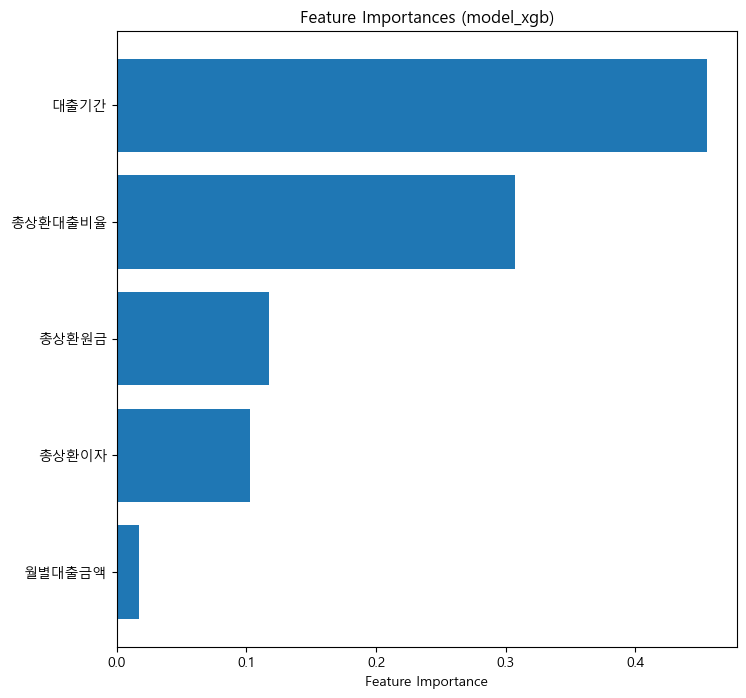

In [24]:
# 피처 중요도 얻기
feature_importances = model_xgb.feature_importances_

# 피처 중요도를 피처 이름과 함께 DataFrame으로 만들기
feature_importance_model_xgb = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# 중요도에 따라 내림차순 정렬
feature_importance_model_xgb = feature_importance_model_xgb.sort_values(by='Importance', ascending=True)

# 피처 중요도 시각화
plt.figure(figsize=(8, 8))
plt.barh(feature_importance_model_xgb['Feature'], feature_importance_model_xgb['Importance'])
plt.xlabel('Feature Importance')
plt.title('Feature Importances (model_xgb)')
plt.show()

## 3) 하이퍼파라메터 튜닝

#### 1) XGBoost

In [25]:
# xgboost
model_xgb = XGBClassifier(n_estimators=500, learning_rate=0.5, max_depth=10, subsample=1, tree_method = "exact")
model_xgb.fit(X_train, y_train)

y_pred_train = model_xgb.predict(X_train)
y_pred_test = model_xgb.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

result_xgb = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result_xgb)

,accuracy,F1
train,0.972155,0.972208
test,0.922737,0.922533


## 그리드 서치

- XGBClassifier 그리드서치

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# XGBoost 모델 정의
model_xgb = XGBClassifier()

# 탐색할 하이퍼파라미터 공간 정의
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500, 600],  # 트리의 개수
    'learning_rate': [0.01, 0.1, 0.2, 0.5],  # 학습률
    'max_depth': [3, 5, 7, 10, 20],  # 트리의 최대 깊이
    'subsample': [0, 0.5, 0.8, 1.0],  # 각 트리에서 사용할 샘플의 비율
    'tree_method': ['auto', 'exact', 'approx', 'hist'],  # 트리 구성 방법
}

# GridSearchCV를 사용하여 최적의 하이퍼파라미터 탐색
grid_search = GridSearchCV(estimator=model_xgb, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print("최적의 하이퍼파라미터:", grid_search.best_params_)

# 최적의 모델로 예측
best_model = grid_search.best_estimator_
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

# 성능 측정
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

# 결과 출력
result_xgb_tuned = pd.DataFrame({'accuracy': [train_accuracy, test_accuracy],
                                  'F1': [train_f1_score, test_f1_score]},
                                  index=['train', 'test'])

print(result_xgb_tuned)